In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Achyut_gfg/News.csv',index_col=0)
print(df.shape)
df.head()

(44919, 5)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Dropping unwanted columns

In [84]:
df = df.drop(['title', 'date'], axis=1)
df.head()

,text,subject,class
0,Donald Trump just couldn t wish all Americans ...,News,0
1,House Intelligence Committee Chairman Devin Nu...,News,0
2,"On Friday, it was revealed that former Milwauk...",News,0
3,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis used his annual Christmas Day mes...,News,0


Merging columns

In [85]:
df['text'] = df['subject'] + ' ' + df['text']
df = df.drop(['subject'], axis=1)
df.head()

,text,class
0,News Donald Trump just couldn t wish all Ameri...,0
1,News House Intelligence Committee Chairman Dev...,0
2,"News On Friday, it was revealed that former Mi...",0
3,"News On Christmas day, Donald Trump announced ...",0
4,News Pope Francis used his annual Christmas Da...,0


In [86]:
print("Number of missing values in each column:")
print(df.isnull().sum())
print("We drop the missing values")
df = df.dropna()
print("The shape of the dataset is now: ", df.shape)

Number of missing values in each column:
text     21
class     0
dtype: int64
We drop the missing values
The shape of the dataset is now:  (44898, 2)


<Axes: xlabel='class', ylabel='count'>

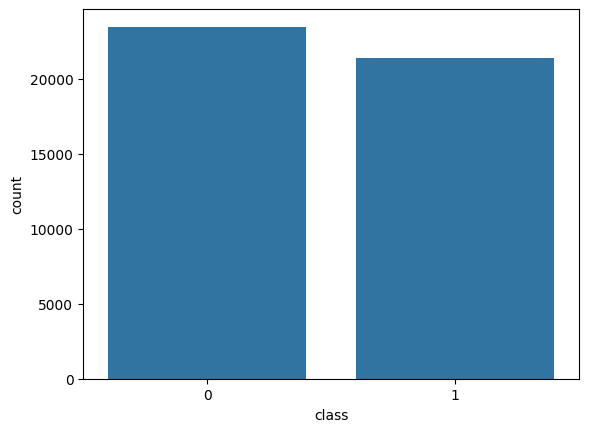

In [87]:
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)


In [88]:
df = df.sample(frac=0.1, random_state = None)
df.reset_index(inplace=True)
df.drop(["index"], axis=1, inplace=True)
print(df.shape)

(4490, 2)


<Axes: xlabel='class', ylabel='count'>

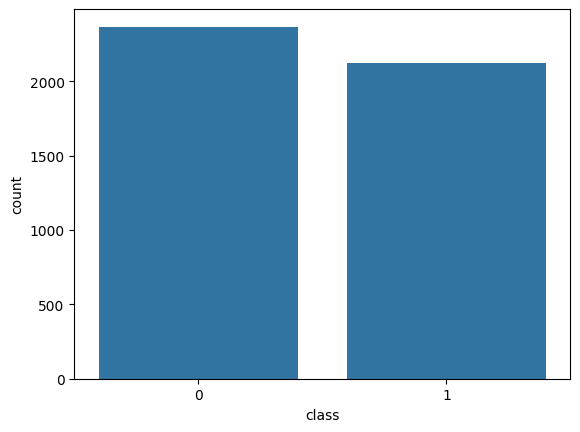

In [89]:
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)


Converting all words to lower-case

In [90]:
df = df.apply(lambda x: x.astype(str).str.lower())
print(df.head())

                                                text class
0  politicsnews abu dhabi (reuters) - u.s. defens...     1
1                                         politics       0
2  news you know that  well-regulated militia  th...     0
3  worldnews dubai (reuters) - a gunfight erupted...     1
4  news in retaliation of bruce springsteen cance...     0


In [91]:
df['text'] = df['text'].str.replace('[^\w\s,]', '')
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace(' ,', ',')
df['text'] = df['text'].str.replace(', ', ',')

<ipython-input-91-fca5e7e659c5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s,]', '')
<ipython-input-91-fca5e7e659c5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)




*   The regular expression [^\w\s,] matches any character that is not a word character, whitespace, or comma. By replacing such characters with an empty string, this line effectively removes any special characters or punctuation from the text.

*   Second line removes URLs (links) from the text. It uses a regular expression to match patterns starting with http or www, followed by any non-whitespace characters (\S+).



In [92]:
print(df.head())

                                                text class
0  politicsnews abu dhabi reuters  us defense sec...     1
1                                         politics       0
2  news you know that  wellregulated militia  tha...     0
3  worldnews dubai reuters  a gunfight erupted br...     1
4  news in retaliation of bruce springsteen cance...     0


In [93]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x))
print(df.head())

                                                text class
0  [politicsnews, abu, dhabi, reuters, us, defens...     1
1                                         [politics]     0
2  [news, you, know, that, wellregulated, militia...     0
3  [worldnews, dubai, reuters, a, gunfight, erupt...     1
4  [news, in, retaliation, of, bruce, springsteen...     0




*   Second line initializes a RegexpTokenizer object with the regular expression r'\w+'. This regular expression matches any sequence of one or more word characters (letters, digits, or underscores).
*   Third line applies the tokenizer to each element in the 'text' column of a DataFrame df. It uses the apply() function along with a lambda function to tokenize each text element using the previously defined tokenizer. The result is then assigned back to the 'text' column of the DataFrame.



In [94]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
print(df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text class
0  [politicsnews, abu, dhabi, reuters, u, defense...     1
1                                         [politics]     0
2  [news, you, know, that, wellregulated, militia...     0
3  [worldnews, dubai, reuters, a, gunfight, erupt...     1
4  [news, in, retaliation, of, bruce, springsteen...     0


In [95]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])
print(df.head())

                                                text class
0  [politicsnews, abu, dhabi, reuters, u, defense...     1
1                                         [politics]     0
2  [news, know, wellregulated, militia, mentioned...     0
3  [worldnews, dubai, reuters, gunfight, erupted,...     1
4  [news, retaliation, bruce, springsteen, cancel...     0




*   Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good.
*   WordNet is a lexical database for the English language, while stopwords are common words (like "the", "is", "and", etc.) that are often removed from text data during preprocessing.





In [96]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))
df.head()

,text,class
0,politicsnews abu dhabi reuters u defense secre...,1
1,politics,0
2,news know wellregulated militia mentioned seco...,0
3,worldnews dubai reuters gunfight erupted brief...,1
4,news retaliation bruce springsteen cancelling ...,0


This part joins the tokens within the list x into a single string, using a space ' ' as the separator.

The resulting string is then assigned back to the 'text' column of the DataFrame, effectively converting the tokenized text back into a format where each document is represented as a single string.

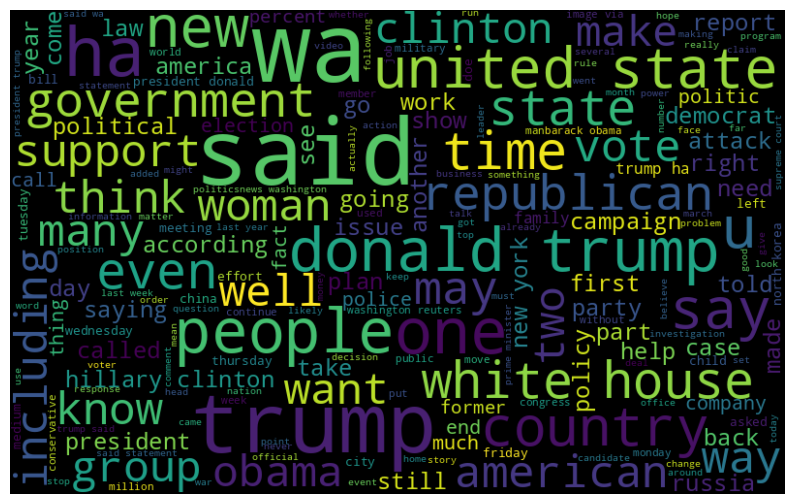

In [97]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The word cloud visualization generated by this code represents the frequency of words found in the text data from the 'text' column of the DataFrame df. Words that appear more frequently in the text data will be displayed with larger font sizes in the word cloud.

In [98]:
def to_vector_Tfidf(df, col):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=1000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])

def to_vector_bow(df, col):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_features=1000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])

These are two functions used for converting text data into numerical vectors using different techniques: TF-IDF (Term Frequency-Inverse Document Frequency) and Bag of Words (BoW).

*   Bag of Words: Converting words to numbers with no semantic information.

*   TF-IDF: It is also converting the words to numbers or vectors with some weighted information.



In [99]:
text_vector_tfidf = to_vector_Tfidf(df, 'text')
print("Shape of the tfidf vector: ", text_vector_tfidf.shape)
print(text_vector_tfidf.shape)
text_vector_bow = to_vector_bow(df, 'text')
print("Shape of the text vector for bow vectorization: ", text_vector_bow.shape)
print(text_vector_bow.shape)

Shape of the tfidf vector:  (4490, 1000)
(4490, 1000)
Shape of the text vector for bow vectorization:  (4490, 1000)
(4490, 1000)


#PCA

In [100]:
from sklearn.decomposition import PCA
y = np.array(df['class'])

# Perform PCA to obtain principal components
text_vector_tfidf_copy=text_vector_tfidf.copy()
pca = PCA(n_components=10)  # Choose 10 components
principal_components = pca.fit_transform(text_vector_tfidf_copy.toarray())

# Convert principal components to DataFrame
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

# Concatenate principal components with class labels
pc_df_with_label = pd.concat([pc_df, pd.DataFrame(y, columns=['label'])], axis=1)

# Create pair plot
sns.pairplot(pc_df_with_label, hue='label', palette='husl')
plt.title('Pair Plot of First 10 Principal Components with Class Labels')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [101]:
y = np.array(df['class'])
# Perform PCA to obtain principal components
text_vector_bow_copy=text_vector_bow.copy()
pca = PCA(n_components=10)  # Choose 10 components
principal_components = pca.fit_transform(text_vector_bow_copy.toarray())

# Convert principal components to DataFrame
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

# Concatenate principal components with class labels
pc_df_with_label = pd.concat([pc_df, pd.DataFrame(y, columns=['label'])], axis=1)

# Create pair plot
sns.pairplot(pc_df_with_label, hue='label', palette='husl')
plt.title('Pair Plot of First 10 Principal Components with Class Labels')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

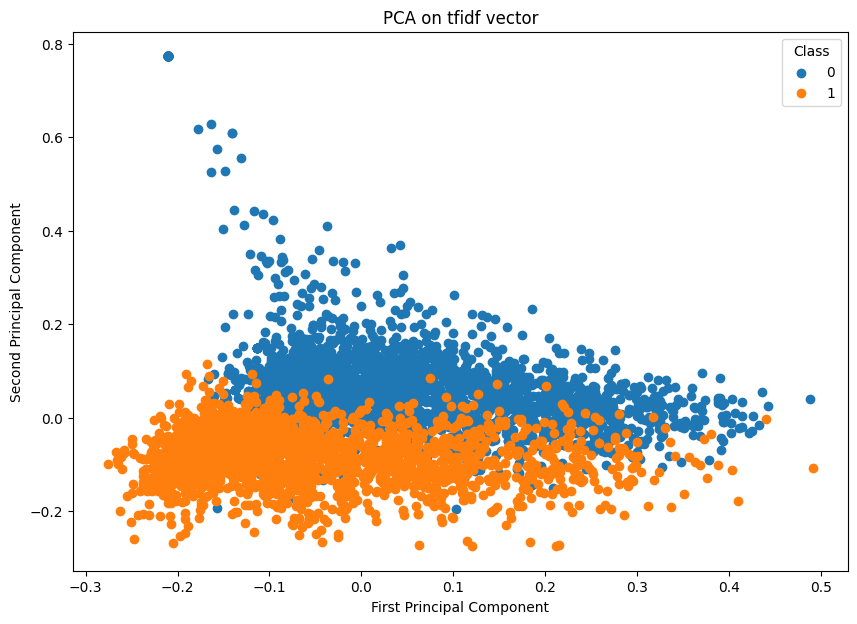

In [102]:
labels = np.array(df['class'])
text_vector_tfidf_copy=text_vector_tfidf.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
tfidf_pca_result = pca.fit_transform(text_vector_tfidf_copy.toarray())
plt.figure(figsize=(10, 7))
for label in np.unique(labels):
    plt.scatter(tfidf_pca_result[labels == label, 0], tfidf_pca_result[labels == label, 1], label=label)
# plt.scatter(pca.components_[0], pca.components_[1])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on tfidf vector')
plt.legend(title='Class')
plt.show()

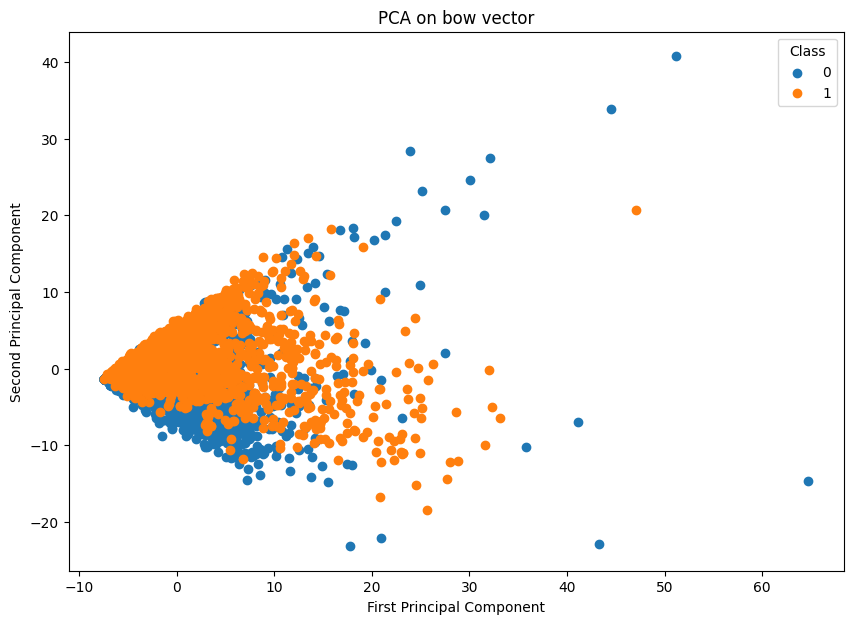

In [103]:
labels = np.array(df['class'])
text_vector_bow_copy=text_vector_bow.copy()
pca = PCA(n_components=3)
bow_pca_result=pca.fit_transform(text_vector_bow_copy.toarray())
plt.figure(figsize=(10, 7))
for label in np.unique(labels):
    plt.scatter(bow_pca_result[labels == label, 0], bow_pca_result[labels == label, 1], label=label)
# plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on bow vector')
plt.legend(title='Class')
plt.show()

#Model Creation


In [104]:
text_vector_tfidf = text_vector_tfidf.toarray()
text_vector_bow = text_vector_bow.toarray()

In [105]:
class_vector = df['class'].values
class_vector = class_vector.reshape(-1, 1)

In [106]:
dataF1 = np.concatenate((text_vector_tfidf, class_vector), axis=1)
dataF2 = np.concatenate((text_vector_bow, class_vector), axis=1)

print(dataF1.shape)
print(dataF2.shape)

(4490, 1001)
(4490, 1001)


In [107]:
dataF1=pd.DataFrame(dataF1)
dataF2=pd.DataFrame(dataF2)
print(dataF1.head())

  0    1    2    3         4    5    6    7    8         9     ...      991   \
0  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0       0.0  ...  0.062911   
1  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0       0.0  ...       0.0   
2  0.0  0.0  0.0  0.0  0.073239  0.0  0.0  0.0  0.0       0.0  ...       0.0   
3  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0       0.0  ...   0.03807   
4  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.065707  ...  0.077904   

  992       993  994       995       996  997  998  999  1000  
0  0.0       0.0  0.0       0.0       0.0  0.0  0.0  0.0    1  
1  0.0       0.0  0.0       0.0       0.0  0.0  0.0  0.0    0  
2  0.0       0.0  0.0  0.036686  0.080239  0.0  0.0  0.0    0  
3  0.0       0.0  0.0  0.043402       0.0  0.0  0.0  0.0    1  
4  0.0  0.055067  0.0       0.0       0.0  0.0  0.0  0.0    0  

[5 rows x 1001 columns]


In [108]:
for i in range(1000):
    dataF1.rename(columns={i: 'tfidf'+str(i)}, inplace=True)
    dataF2.rename(columns={i: 'bow'+str(i)}, inplace=True)
dataF1.rename(columns={1000: 'class'}, inplace=True)
dataF2.rename(columns={1000: 'class'}, inplace=True)
dataF1.head()

,tfidf0,tfidf1,tfidf2,tfidf3,tfidf4,tfidf5,tfidf6,tfidf7,tfidf8,tfidf9,...,tfidf991,tfidf992,tfidf993,tfidf994,tfidf995,tfidf996,tfidf997,tfidf998,tfidf999,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.073239,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.036686,0.080239,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03807,0.0,0.0,0.0,0.043402,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065707,...,0.077904,0.0,0.055067,0.0,0.0,0.0,0.0,0.0,0.0,0


In [109]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataF1.drop('class', axis=1), dataF1['class'], test_size=0.2, random_state=0)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataF2.drop('class', axis=1), dataF2['class'], test_size=0.2, random_state=0)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=0)

code prepares two datasets (dataF1 and dataF2) for training and evaluation by splitting them into training, validation, and test sets. This is a common practice in machine learning to assess model performance and tune hyperparameters effectively.








Naive Bayes, Logistic Regression, Decision Trees, Random Forest, SVM are the possibilities for next stage model implementation.

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



*   GaussianNB: Naive Bayes classifier for Gaussian-distributed data.
*   LogisticRegression: Logistic Regression classifier.
*   DecisionTreeClassifier: Decision Tree classifier.
*   RandomForestClassifier: Random Forest classifier.
*   SVC: Support Vector Classifier.
*   accuracy_score: Computes the accuracy classification score.
*   classification_report: Builds a text report showing the main classification metrics.
*   learning_curve: Generates learning curves for classifiers.
*   GridSearchCV: Performs grid search over a parameter grid.

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.









#Gaussian Naive Bayes

Gaussian Naive Bayes (GNB) is a classification technique used in machine learning based on a probabilistic approach and Gaussian distribution. Gaussian Naive Bayes assumes that each parameter, also called features or predictors, has an independent capacity of predicting the output variable

In [111]:
def gauss_grid_learn(X_train,y_train,X_val,y_val):
    gnb=GaussianNB()
    param_grid = {'var_smoothing': np.logspace(0,-9, num=10)}
    grid_search = GridSearchCV(gnb, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Gaussian Naive Bayes")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

The above code first creates an instance of the Gaussian Naive Bayes classifier.

`param_grid = {'var_smoothing': np.logspace(0,-9, num=10)}`

The above line defines a parameter grid for grid search. It specifies different values for the var_smoothing parameter.

The variable, var_smoothing, artificially adds a user-defined value to the distribution's variance (whose default value is derived from the training data set). This essentially widens (or "smooths") the curve and accounts for more samples that are further away from the distribution mean.

This code performs grid search using GridSearchCV over the specified parameter grid.


*   cv=3 specifies 3-fold cross-validation.
*   refit=True refits the best estimator on the entire training set.
*   n_jobs=-1 uses all available CPU cores.
*   scoring='accuracy' specifies accuracy as the scoring metric.
*   verbose=1 prints progress messages.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 1e-09}
0.9649225084599832
Accuracy:  0.9643652561247216
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       237
           1       0.93      1.00      0.96       212

    accuracy                           0.96       449
   macro avg       0.96      0.97      0.96       449
weighted avg       0.97      0.96      0.96       449

[learning_curve] Training set sizes: [ 239  778 1316 1855 2394]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   28.7s finished


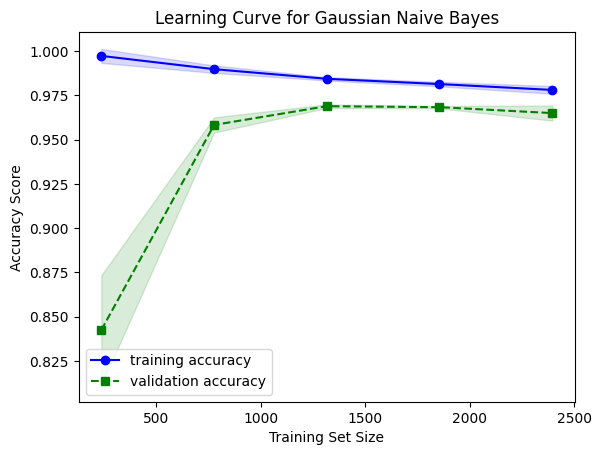

In [112]:
gauss_grid_learn(X_train1,y_train1,X_test1,y_test1)

#Logistic regression

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

In [113]:
def logistic_grid_learn(X_train,y_train,X_val,y_val):
    logreg=LogisticRegression(random_state=0,max_iter=20000)
    param_grid = {'C': [0.1, 1, 10],'tol': [0.0001, 0.001, 1, 10]}
    grid_search = GridSearchCV(logreg, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Logistic Regression")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

`logreg=LogisticRegression(random_state=0,max_iter=20000)`

This line creates an instance of the Logistic Regression classifier with a maximum number of iterations set to 20000.

`param_grid = {'C': [0.1, 1, 10],'tol': [0.0001, 0.001, 1, 10]}`

This line defines a parameter grid for grid search. It specifies different values for the C and tol parameters.

The “C” hyperparameter controls the strength of the regularization. A smaller value for “C” (e.g. C=0.01) leads to stronger regularization and a simpler model, while a larger value (e.g. C=1.0) leads to weaker regularization and a more complex model.

"tol" is the tolerance for the stopping criteria. This tells scikit to stop searching for a minimum (or maximum) once some tolerance is achieved, i.e. once you're close enough. tol will change depending on the objective function being minimized and the algorithm they use to find the minimum, and thus will depend on the model you are fitting

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 10, 'tol': 0.0001}
0.9844091772744791
Accuracy:  0.9755011135857461
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       237
           1       0.97      0.98      0.97       212

    accuracy                           0.98       449
   macro avg       0.98      0.98      0.98       449
weighted avg       0.98      0.98      0.98       449

[learning_curve] Training set sizes: [ 239  778 1316 1855 2394]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   29.2s finished


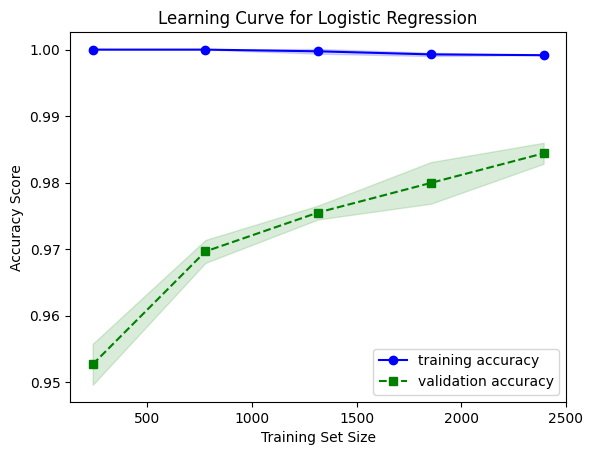

In [114]:
logistic_grid_learn(X_train1,y_train1,X_test1,y_test1)

#Decision Tree

A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [115]:
def decision_grid_learn(X_train,y_train,X_val,y_val):
    dtree=DecisionTreeClassifier(random_state=0)
    param_grid = {'criterion':["gini","entropy"],'max_depth': [10, 50, 100, None]}
    grid_search = GridSearchCV(dtree, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Decision Tree")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'gini', 'max_depth': 10}
0.9905353720044872
Accuracy:  0.9955456570155902
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       237
           1       0.99      1.00      1.00       212

    accuracy                           1.00       449
   macro avg       1.00      1.00      1.00       449
weighted avg       1.00      1.00      1.00       449

[learning_curve] Training set sizes: [ 239  778 1316 1855 2394]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   29.1s finished


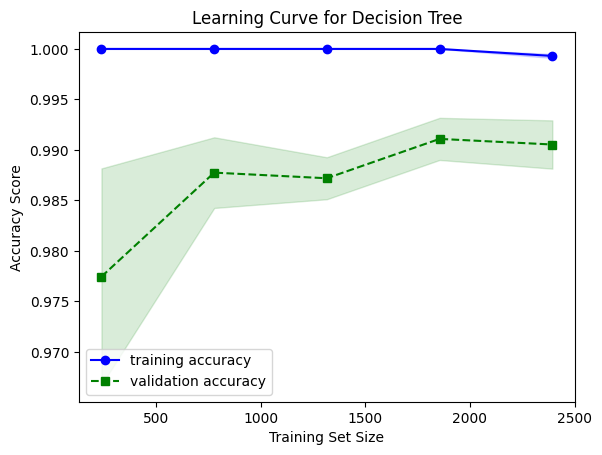

In [116]:
decision_grid_learn(X_train1,y_train1,X_test1,y_test1)

#Random Forest

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set

In [117]:
def random_grid_learn(X_train,y_train,X_val,y_val):
    rtree=RandomForestClassifier(random_state=0)
    param_grid = {'max_depth': [10,50, 100, None],'criterion': ['gini', 'entropy']}
    grid_search = GridSearchCV(rtree, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Random Forest")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'gini', 'max_depth': 50}
0.9988863365983126
Accuracy:  0.9977728285077951
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       212

    accuracy                           1.00       449
   macro avg       1.00      1.00      1.00       449
weighted avg       1.00      1.00      1.00       449

[learning_curve] Training set sizes: [ 239  778 1316 1855 2394]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   37.3s finished


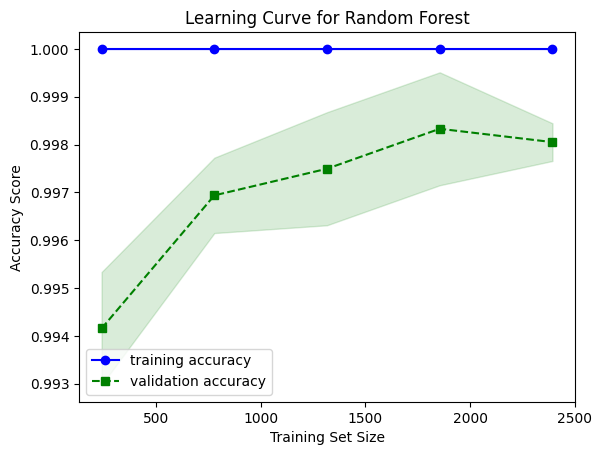

In [118]:
random_grid_learn(X_train1,y_train1,X_test1,y_test1)

#Support Vector Machine

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [119]:
def svm_grid_learn(X_train,y_train,X_val,y_val):
    svm=SVC(random_state=0)
    param_grid={'C':[0.1,1,100],'kernel':['rbf','linear']}
    grid_search = GridSearchCV(svm, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for SVM")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

 The "kernel" is a function used to transform the input data into a higher-dimensional space. The kernel trick allows SVMs to handle non-linearly separable data by implicitly mapping the input vectors into a higher-dimensional space where the classes become separable by a hyperplane.

 The two most commonly used kernels are:



1.   Linear Kernel ('linear'):

> *   The linear kernel represents the simplest form of kernel function.
*   It computes the dot product between the input vectors directly in the original feature space.
*   This kernel is suitable for linearly separable data or when the number of features is large compared to the number of samples.

2.   Radial Basis Function Kernel ('rbf' or Gaussian Kernel):

> *   The RBF kernel is a popular choice for SVMs as it can capture complex relationships in the data.
*   It maps the input vectors into an infinite-dimensional space using a Gaussian radial basis function.
*   This kernel is capable of modeling non-linear decision boundaries.
*   The RBF kernel has a parameter gamma (not explicitly mentioned in the param_grid provided), which controls the spread of the kernel and can significantly affect the performance of the SVM.
















Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'C': 1, 'kernel': 'linear'}
0.9852448316115833
Accuracy:  0.977728285077951
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       237
           1       0.97      0.99      0.98       212

    accuracy                           0.98       449
   macro avg       0.98      0.98      0.98       449
weighted avg       0.98      0.98      0.98       449

[learning_curve] Training set sizes: [ 239  778 1316 1855 2394]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   40.4s finished


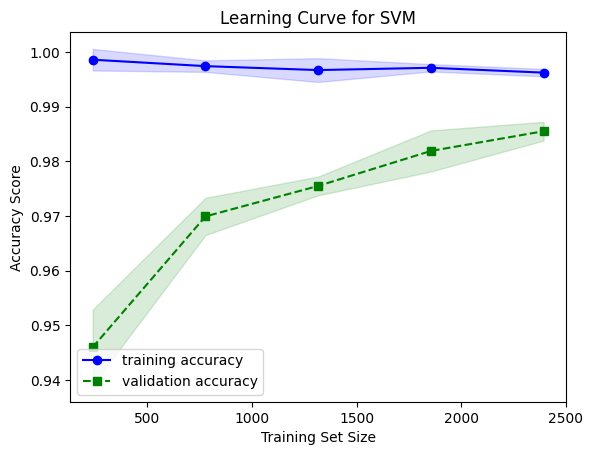

In [120]:
svm_grid_learn(X_train1,y_train1,X_test1,y_test1)